
---

# Análise dos Dados do Airbnb - *Barcelona*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>





**Neste *notebook*, iremos analisar os dados referentes à cidade BARCELONA, e ver quais insights podem ser extraídos a partir de dados brutos.**

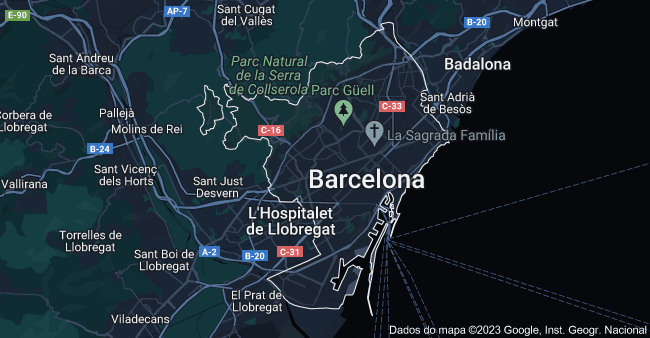

## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame

DATA_PATH = "https://raw.githubusercontent.com/adelphim/dsnp/main/airbnb-barcelona-2023-06-10-listings.csv"

df = pd.read_csv(DATA_PATH)

## Análise dos Dados


In [4]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17230 entries, 0 to 17229
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17230 non-null  int64  
 1   name                            17230 non-null  object 
 2   host_id                         17230 non-null  int64  
 3   host_name                       17228 non-null  object 
 4   neighbourhood_group             17230 non-null  object 
 5   neighbourhood                   17230 non-null  object 
 6   latitude                        17230 non-null  float64
 7   longitude                       17230 non-null  float64
 8   room_type                       17230 non-null  object 
 9   price                           17230 non-null  int64  
 10  minimum_nights                  17230 non-null  int64  
 11  number_of_reviews               17230 non-null  int64  
 12  last_review                     

**Dicionário das variáveis**

* `id`: número para identificação do anúncio
* `name`: nome do anúncio
* `host_id`: número para identificação de quem está alugando
* `host_name`: nome para identificação de quem está alugando
* `neighbourhood_group`: ⁉
* `neighbourhood`: nome do bairro
* `latitude`: coordenada geográfica do imóvel
* `longitude`: coordenada geográfica do imóvel
* `room_type`: tipo do imóvel
* `price`: preço de anúncio do imóvel
* `minimum_nights`: quantidade de noites minimas para aluguel
* `number_of_reviews`: quantidade de resenhas
* `last_review`: data a ultima resenha
* `reviews_per_month`: quantidade de resenhas por mês
* `calculated_host_listings_count`: quantidade de de quem está aalugando
* `availability_365`: quantidade de dias disponpíveis para alocação no ano
* `number_of_reviews_ltm`: quantidad de resenhas que o anuncio tem nos 12 ultimos meses
* `license`: identificação unica da reserva

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.723000e+04,1.723000e+04,17230.000000,17230.000000,17230.000000,17230.000000,17230.000000,13198.000000,17230.000000,17230.000000,17230.000000
mean,2.452457e+17,1.577106e+08,41.391854,2.167149,177.689959,14.375218,42.310215,1.438544,28.073244,172.454208,11.988799
std,3.583623e+17,1.652453e+08,0.013882,0.017245,876.724391,33.905670,83.509961,1.839384,53.164134,124.998430,23.295948
min,1.867400e+04,3.073000e+03,41.352608,2.091590,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.043217e+07,9.536735e+06,41.381040,2.157150,55.000000,1.000000,1.000000,0.230000,1.000000,56.000000,0.000000
50%,4.215769e+07,8.489767e+07,41.389566,2.168260,111.000000,3.000000,7.000000,0.870000,5.000000,171.000000,2.000000
75%,6.601314e+17,2.871165e+08,41.401190,2.177500,214.000000,31.000000,43.000000,2.100000,25.000000,293.000000,16.000000
max,9.100075e+17,5.185810e+08,41.459560,2.227710,90000.000000,1125.000000,1751.000000,50.640000,265.000000,365.000000,768.000000


Inicialmente podemos perceber que existe alguns valores discrepantes e que haverão necessidade de limpeza para que a analise a seguir seja melhor representada


*   `price`
*   `minimum_nights`



In [7]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Rental unit in Barcelona · ★4.35 · 3 bedrooms ...,71615,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,210,1,35,2023-04-07,0.29,28,18,8,HUTB-002062
1,23197,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412907,2.220633,Entire home/apt,250,4,72,2023-05-29,0.48,2,185,13,HUTB005057
2,41952,Rental unit in Barcelona · ★4.35 · 2 bedrooms ...,183340,Teresa,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405680,2.169430,Entire home/apt,172,3,66,2023-05-26,0.49,5,269,22,HUTB-003549
3,32711,Rental unit in Barcelona · ★4.43 · 2 bedrooms ...,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,186,2,91,2023-03-22,0.63,3,256,24,HUTB-001722
4,46153,Rental unit in Barcelona · ★4.20 · 2 bedrooms ...,90417,Etain (Marnie),Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.389560,2.177590,Entire home/apt,63,31,5,2022-07-31,0.03,2,176,1,Exempt


In [8]:
# mostrar as 5 ultimas entradas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
17225,909333050152586756,Rental unit in Barcelona · ★New · 1 bedroom · ...,492807178,Rosa,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.389625,2.179024,Private room,65,1,0,NaN,NaN,33,365,0,Exempt
17226,909347845538314221,Rental unit in Barcelona · ★New · 2 bedrooms ·...,239550764,Jaye Anne,Sarrià-Sant Gervasi,Sant Gervasi - la Bonanova,41.403783,2.136933,Entire home/apt,63,31,0,NaN,NaN,23,145,0,NaN
17227,909355184941954314,Rental unit in Barcelona · ★New · 1 bedroom · ...,492807178,Rosa,Ciutat Vella,el Barri Gòtic,41.384334,2.175138,Private room,65,1,0,NaN,NaN,33,361,0,Exempt
17228,909364014604079283,Rental unit in Barcelona · ★New · 1 bedroom · ...,492807178,Rosa,Ciutat Vella,el Raval,41.376588,2.174328,Entire home/apt,100,1,0,NaN,NaN,33,355,0,Exempt
17229,909387630966968007,Rental unit in Barcelona · ★New · 1 bedroom · ...,492807178,Rosa,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.390315,2.178998,Private room,65,1,0,NaN,NaN,33,359,0,Exempt


A comparação entre o `HEAD` e `TAIL` é importante para analisar se os dados nulos estão seguindo um padrão, ou seja, pode ser que uma variável passou a ser inserida apenas após uma determinada data.
Nesse estudo de caso, o padrão de **inicio** e **fim** se **mantiveram**.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [9]:
# identificar o volume de dados do DataFrame
print(f'Entradas(linhas): {df.shape[0]}')
print(f'Variáveis(colunas): {df.shape[1]}')
print('\n--- Tipo das variáveis ---\n')

# verificar os tipos das variáveis
display(df.dtypes)

Entradas(linhas): 17230
Variáveis(colunas): 18

--- Tipo das variáveis ---



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

* A coluna `Licence` possui 48,56% de valores nulos
* Colunas `reviews_per_month` e `last_review` possuem 23,40% de valores nulos
* As demais colunas os valores são 0 ou proximo de 0

*Observação*: Esses dados nulos não são relevantes para as analises subsequentes

In [10]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4032
reviews_per_month                 4032
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           8368
dtype: int64

In [11]:
df.isnull().sum() / df.shape[0]

id                                0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000116
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.234010
reviews_per_month                 0.234010
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
license                           0.485665
dtype: float64

In [12]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.485665
reviews_per_month                 0.234010
last_review                       0.234010
host_name                         0.000116
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

In [13]:
# deletando as variáveis não relevantes
df.drop(columns=['license','reviews_per_month','last_review'], inplace=True)

### **Q3. Qual o tipo de distribuição das variáveis?**

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>],
       [<Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >,
        <Axes: >]], dtype=object)

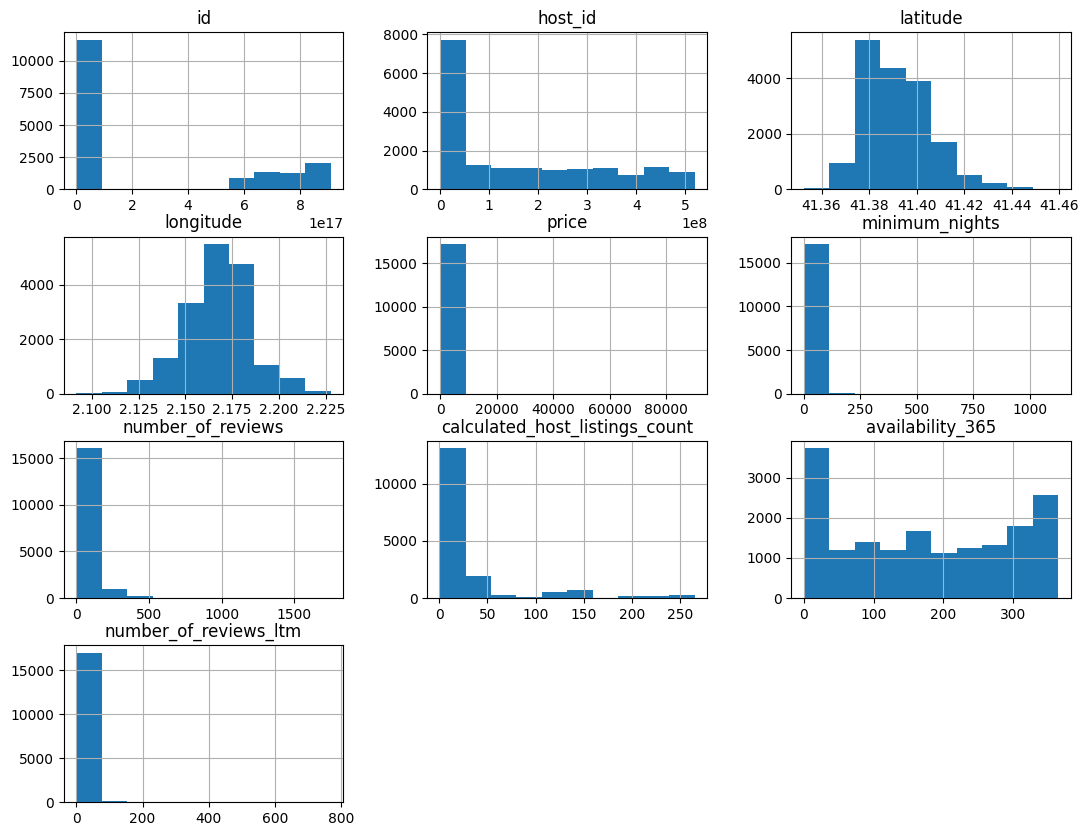

In [14]:
# plotar o histograma das variáveis numéricas
df.hist(figsize=(13,10), bins=10)

As variáveis `price`, `minimum_nights` possuem presença de outliers devido a grande concentração do histograma.

####Determinação da faixa de corte **inferior**`(Q1)` e **superior**`(Q3)`
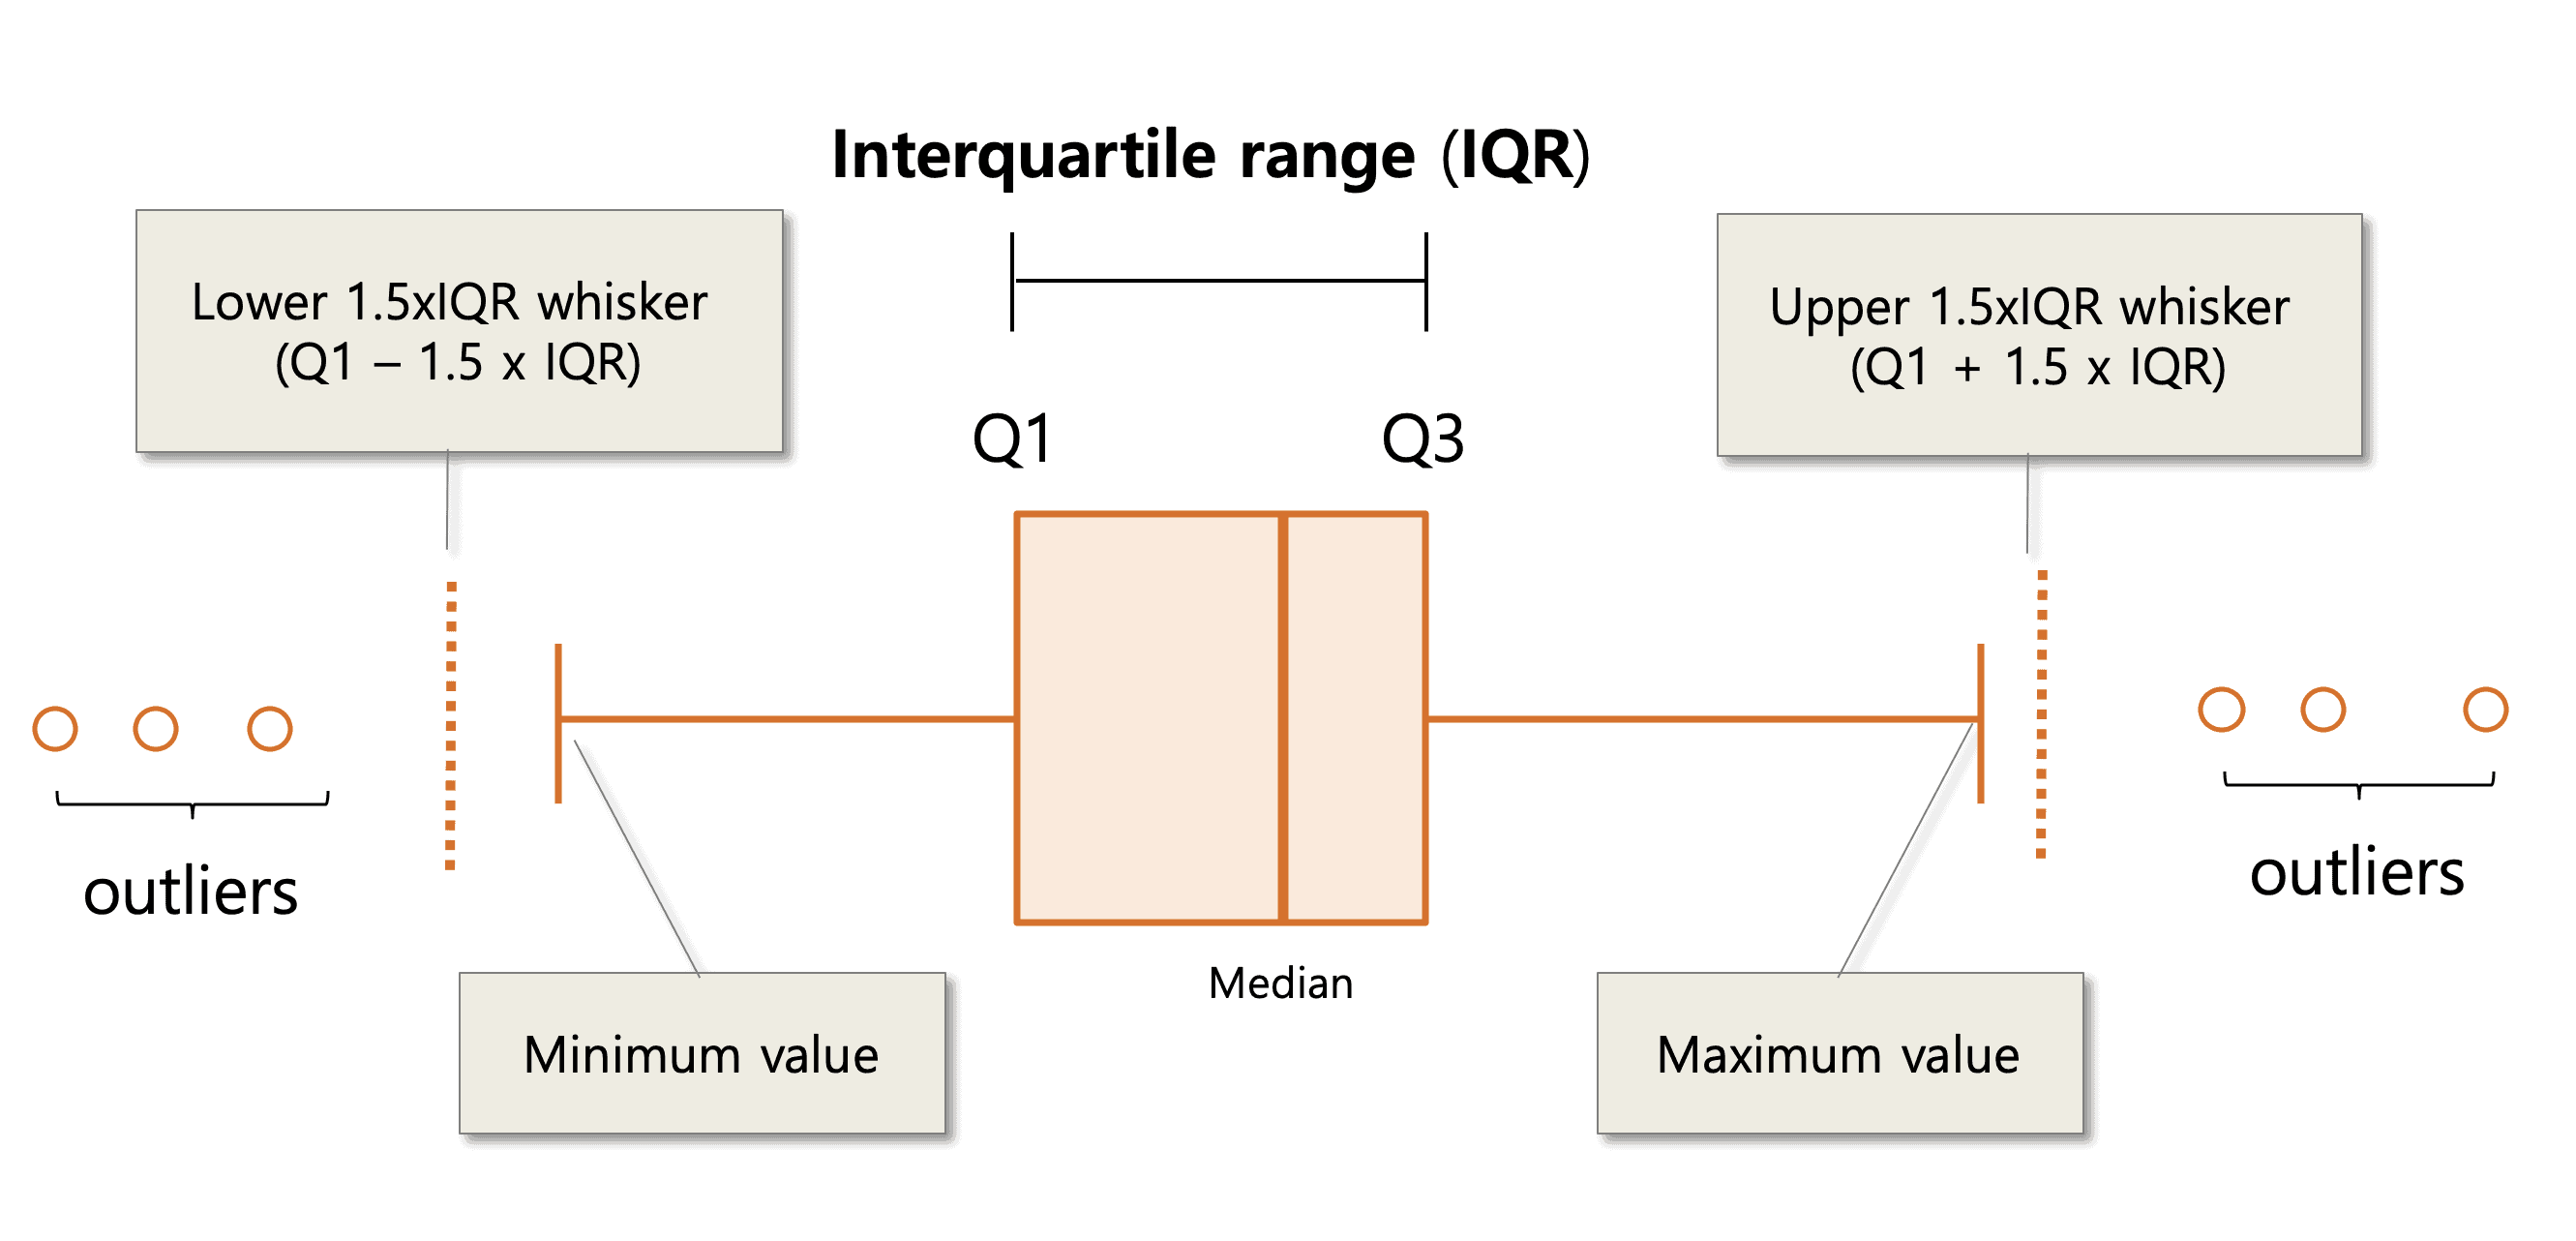

In [15]:
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,17230.000000,17230.000000
mean,177.689959,14.375218
std,876.724391,33.905670
min,0.000000,1.000000
25%,55.000000,1.000000
50%,111.000000,3.000000
75%,214.000000,31.000000
max,90000.000000,1125.000000


#### Boxplot para price

In [16]:
#Price

q1_price = df.price.quantile(.25)
print(f'{q1_price = } ')
q3_price = df.price.quantile(.75)
print(f'{q3_price = } ')
iqr_price = q3_price - q1_price
print(f'{iqr_price = } ')

#definindo os limites
lower_price = q1_price - 1.5 * iqr_price
upper_price = q3_price + 1.5 * iqr_price

print(f"Limite inferior de 'price' = {lower_price} ")
print(f"Limite superior de 'price' = {upper_price} ")

q1_price = 55.0 
q3_price = 214.0 
iqr_price = 159.0 
Limite inferior de 'price' = -183.5 
Limite superior de 'price' = 452.5 


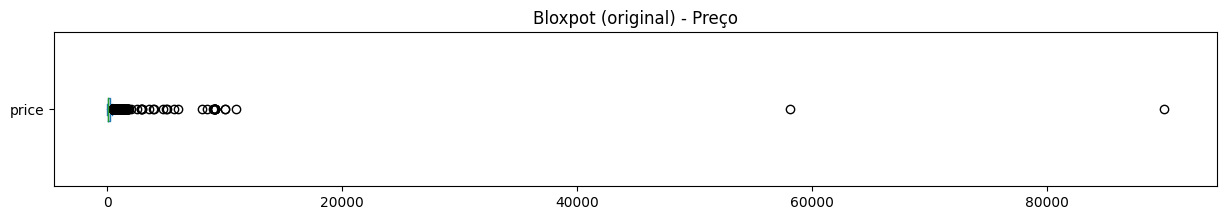


Price: valores acima de 452.5
Representam 734 entradas
Com um percentual de 4.2600%


In [17]:
fig, ax = plt.subplots(figsize=(15,2))
df.price.plot(kind='box', vert=False)
ax.set_title("Bloxpot (original) - Preço")
plt.show()

print(f"\nPrice: valores acima de {upper_price}")
print("Representam {} entradas".format(len(df[df.price > upper_price])))
print("Com um percentual de {:.4f}%".format((len(df[df.price > upper_price]) / df.shape[0])*100))


#### Boxplot para minimum_nights

Barcelona é um local de bastante intercâmbio e por isso escolhido um período minimo de 90 dias `(0.58%)`.

In [18]:
#minimum_nights

q1_mn = df.minimum_nights.quantile(.25)
print(f'{q1_mn = } ')
q3_mn = df.minimum_nights.quantile(.75)
print(f'{q3_mn = } ')
iqr_mn = q3_mn - q1_mn
print(f'{iqr_mn = } ')

#definindo os limites
lower_mn = q1_mn - 1.5 * iqr_mn
upper_mn = q3_mn + 1.5 * iqr_mn

print(f"Limite inferior de 'minimum_nights' = {lower_mn} ")
print(f"Limite superior de 'minimum_nights' = {upper_mn} ")

q1_mn = 1.0 
q3_mn = 31.0 
iqr_mn = 30.0 
Limite inferior de 'minimum_nights' = -44.0 
Limite superior de 'minimum_nights' = 76.0 


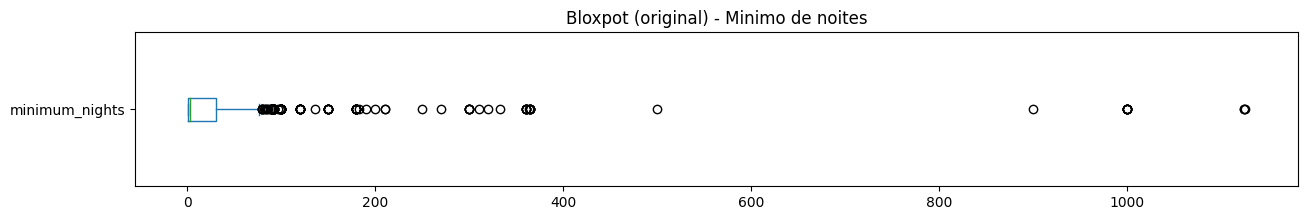

minimum_nights: valores acima de 76.0
Representam 177 entradas
Com um percentual 1.0273%


In [19]:
fig, ax = plt.subplots(figsize=(15, 2))
df.minimum_nights.plot(kind='box', vert=False)
ax.set_title("Bloxpot (original) - Minimo de noites")
plt.show()

print(f"minimum_nights: valores acima de {upper_mn}")
print("Representam {} entradas".format(len(df[df.minimum_nights > upper_mn])))
print("Com um percentual {:.4f}%".format((len(df[df.minimum_nights > upper_mn]) / df.shape[0])*100))

####Limpeza

In [20]:
# criando outro DataFrame para realizar a limpeza dos Outliers
df_clean = df.copy()

In [21]:
# removendo os outliers
df_clean.drop(df_clean[df_clean.price > upper_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > upper_mn].index, axis=0, inplace=True)

# removendo o `neighbourhood_group`, valores nulos
df_clean.drop(columns=['number_of_reviews','number_of_reviews_ltm'], axis=1, inplace=True)

Plotando novamente o Histograma após a limpeza para verificar se os cortes efetuados com o IQR irão auxiliar na tratativa

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>, <Axes: >]],
      dtype=object)

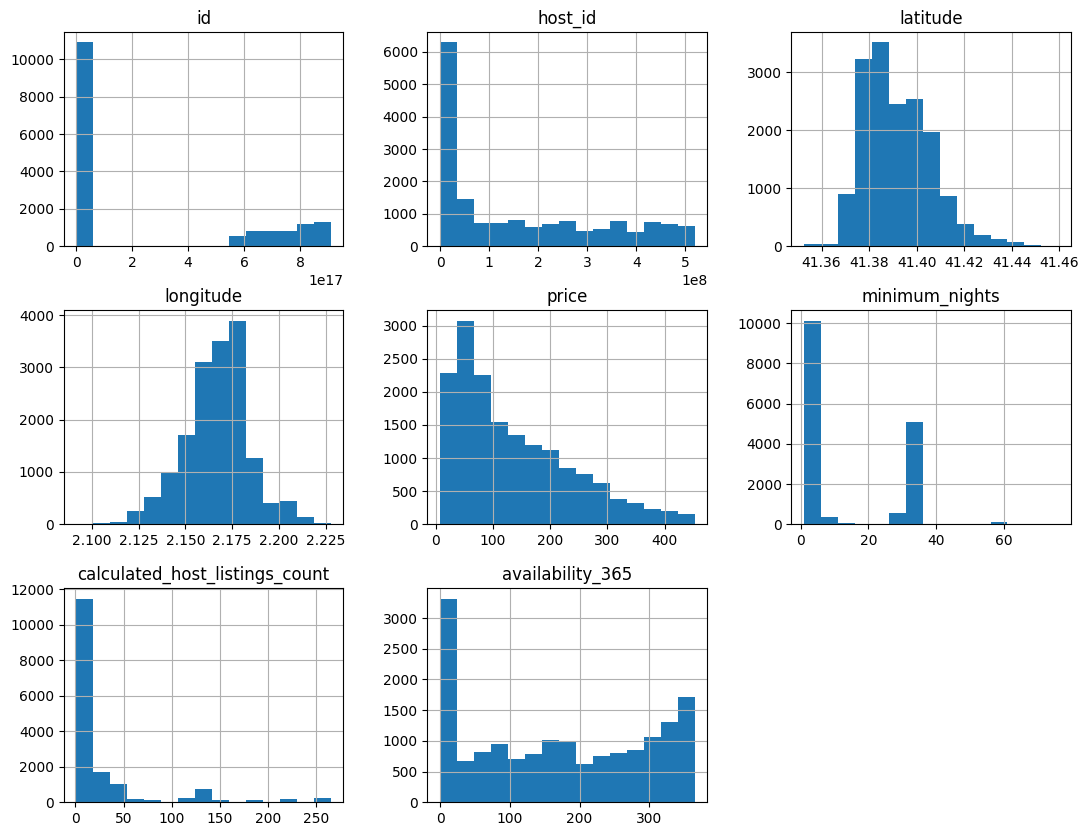

In [22]:
# plotar o histograma das variáveis numéricas
df_clean.hist(figsize=(13,10), bins=15)

É possível perceber que houve uma melhora considerável na descentralização do `price` e `minimum_nights`. Os dados estão mais claros e a seguir ficará melhor a visualização dos os gráfixos de `Bloxplot` *(antes e depois)*

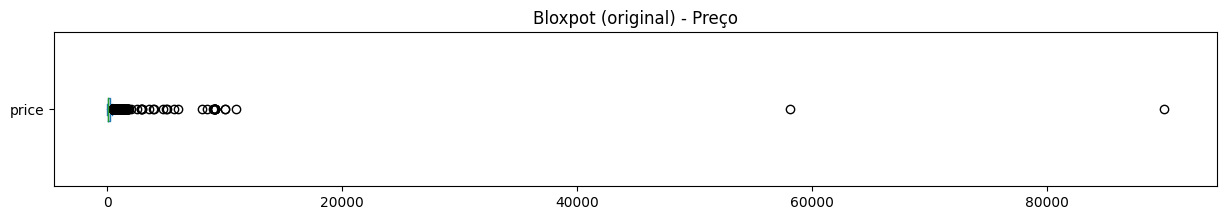


Price: valores acima de 452.5
Representam 734 entradas
Com um percentual de 4.2600%


In [23]:
#Plotando novamente o bloxpot price original

fig, ax = plt.subplots(figsize=(15,2))
df.price.plot(kind='box', vert=False)
ax.set_title("Bloxpot (original) - Preço")
plt.show()

print(f"\nPrice: valores acima de {upper_price}")
print("Representam {} entradas".format(len(df[df.price > upper_price])))
print("Com um percentual de {:.4f}%".format((len(df[df.price > upper_price]) / df.shape[0])*100))

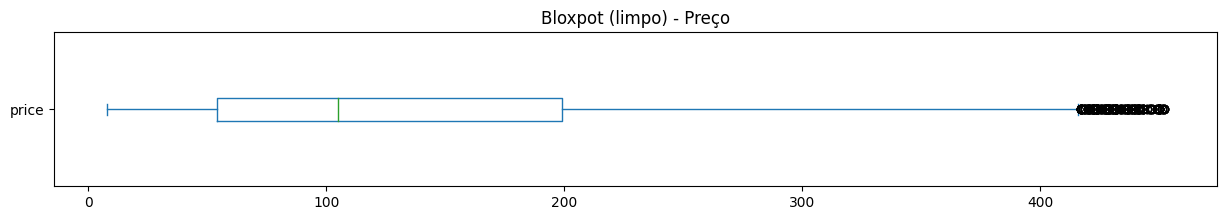

Tamanho original = 17230 entradas
Tamanho limpo = 16328 entradas


In [24]:
#Plotando o bloxpot price após a limpeza
fig, ax = plt.subplots(figsize=(15,2))
df_clean.price.plot(kind='box', vert=False)
ax.set_title("Bloxpot (limpo) - Preço")
plt.show()

print(f"Tamanho original = {df.shape[0]} entradas")
print(f"Tamanho limpo = {df_clean.shape[0]} entradas")

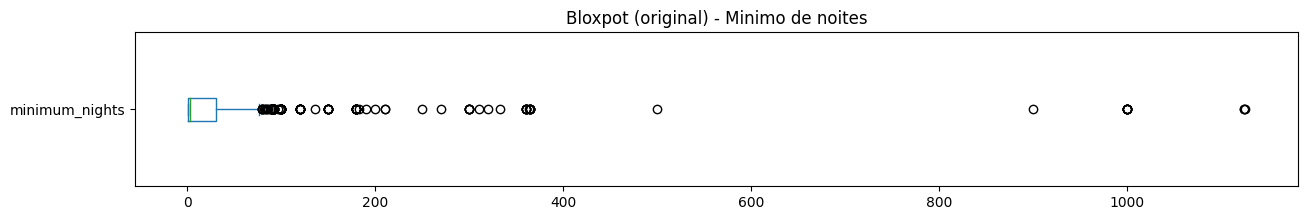

minimum_nights: valores acima de 76.0
Representam 177 entradas
Com um percentual 1.0273%


In [25]:
fig, ax = plt.subplots(figsize=(15, 2))
df.minimum_nights.plot(kind='box', vert=False)
ax.set_title("Bloxpot (original) - Minimo de noites")
plt.show()

print(f"minimum_nights: valores acima de {upper_mn}")
print("Representam {} entradas".format(len(df[df.minimum_nights > upper_mn])))
print("Com um percentual {:.4f}%".format((len(df[df.minimum_nights > upper_mn]) / df.shape[0])*100))

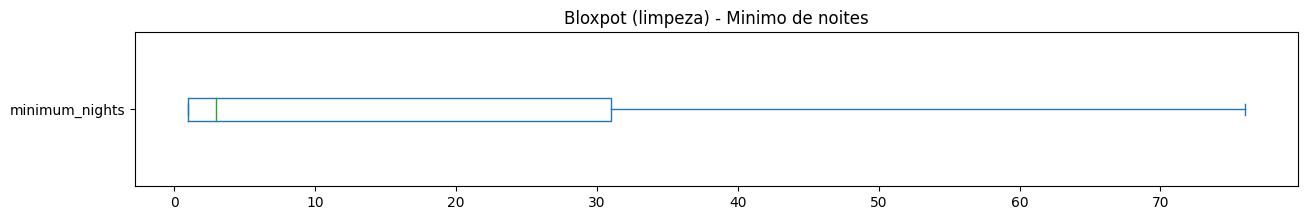

Tamanho original = 17230 entradas
Tamanho limpo = 16328 entradas


In [26]:
fig, ax = plt.subplots(figsize=(15, 2))
df_clean.minimum_nights.plot(kind='box', vert=False)
ax.set_title("Bloxpot (limpeza) - Minimo de noites")
plt.show()

print(f"Tamanho original = {df.shape[0]} entradas")
print(f"Tamanho limpo = {df_clean.shape[0]} entradas")

In [ ]:
df_clean['minimum_nights'].value_counts(ascending=True)

Ainda poderia ser realizado mais alguma limpeza, mas seguirei fiel aos limites inferiores e superiores do Bloxpot

### **Q4. Qual a média dos preços de aluguel?**

In [28]:
df_clean.describe()

,id,host_id,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365
count,1.632800e+04,1.632800e+04,16328.000000,16328.000000,16328.000000,16328.000000,16328.000000,16328.000000
mean,2.507056e+17,1.591695e+08,41.391887,2.167077,136.432447,12.790544,27.776458,170.749755
std,3.605955e+17,1.659841e+08,0.013961,0.017298,100.931939,14.574729,53.048847,125.303857
min,1.867400e+04,3.073000e+03,41.352608,2.091590,8.000000,1.000000,1.000000,0.000000
25%,2.060006e+07,9.822728e+06,41.380990,2.156870,54.000000,1.000000,1.000000,52.000000
50%,4.239086e+07,8.655144e+07,41.389526,2.168287,105.000000,3.000000,5.000000,169.000000
75%,6.655637e+17,2.934561e+08,41.401320,2.177540,199.000000,31.000000,25.000000,292.000000
max,9.099569e+17,5.185810e+08,41.459560,2.227710,452.000000,76.000000,265.000000,365.000000


In [ ]:
# ver a média da coluna `price``
df_clean.price.mean()

In [30]:
df_clean['price'].mean()

136.4324473297403

A média do preço do aluguel na cidade de Barcelona é de `136 €` por noite

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
correlacao = df_clean[['price', 'minimum_nights','calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação

display(correlacao)


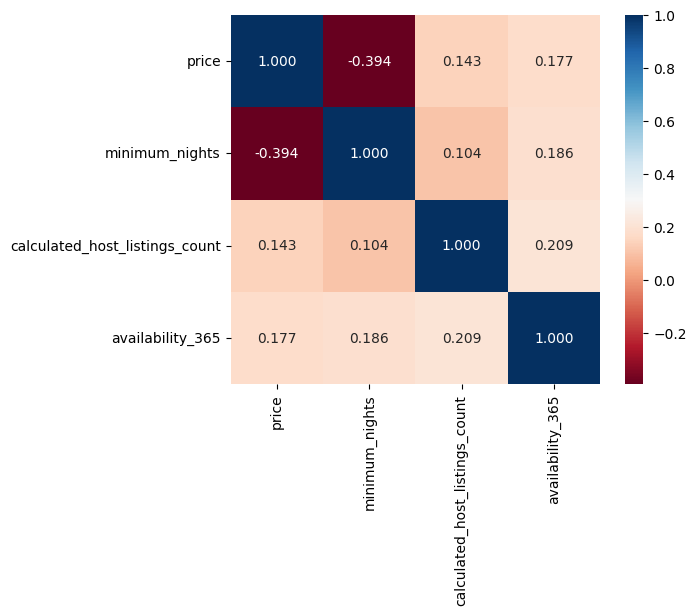

In [32]:
# plotar um heatmap a partir das correlações
sns.heatmap(correlacao, cmap='RdBu', fmt='.3f', square=True, linecolor='w', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [33]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    9531
Private room       6519
Shared room         145
Hotel room          133
Name: room_type, dtype: int64

In [34]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0]) * 100

Entire home/apt    58.372122
Private room       39.925282
Shared room         0.888045
Hotel room          0.814552
Name: room_type, dtype: float64

O tipo de imóvel mais alugado são os **apartamentos**.

### **Q6. Qual a localidade mais cara do dataset?**

A localidade mais cara é `la Vila Olímpica del Poblenou` com o Preço Médio de `189.86 Euros`.
O bairro la **Marina del Prat Vermell** deve ser desconsiderado do TOP10🔝 por
não representar uma quantidade significativa de *Entradas* em relação aos *demais*.
:

In [35]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
la Vila Olímpica del Poblenou                   189.861789
la Dreta de l'Eixample                          185.981313
Diagonal Mar i el Front Marítim del Poblenou    178.607477
Sant Antoni                                     157.756333
l'Antiga Esquerra de l'Eixample                 157.393743
la Sagrada Família                              156.855779
la Marina del Prat Vermell                      155.625000
el Fort Pienc                                   154.196581
Sant Gervasi - Galvany                          147.764988
el Parc i la Llacuna del Poblenou               145.860963
Name: price, dtype: float64

In [43]:
display(df_clean[df_clean.neighbourhood == 'la Vila Olímpica del Poblenou'].shape[0])
display(df_clean[df_clean.neighbourhood == "la Dreta de l'Eixample"].shape[0])
display(df_clean[df_clean.neighbourhood == 'Diagonal Mar i el Front Marítim del Poblenou'].shape[0])
display(df_clean[df_clean.neighbourhood == "Sant Antoni"].shape[0])
display(df_clean[df_clean.neighbourhood == "l'Antiga Esquerra de l'Eixample"].shape[0])
display(df_clean[df_clean.neighbourhood == "la Sagrada Família"].shape[0])
display(df_clean[df_clean.neighbourhood == "la Marina del Prat Vermell"].shape[0])
display(df_clean[df_clean.neighbourhood == "el Fort Pienc"].shape[0])
display(df_clean[df_clean.neighbourhood == "Sant Gervasi - Galvany"].shape[0])
display(df_clean[df_clean.neighbourhood == "el Parc i la Llacuna del Poblenou"].shape[0])



123

1980

107

829

927

943

8

468

417

187

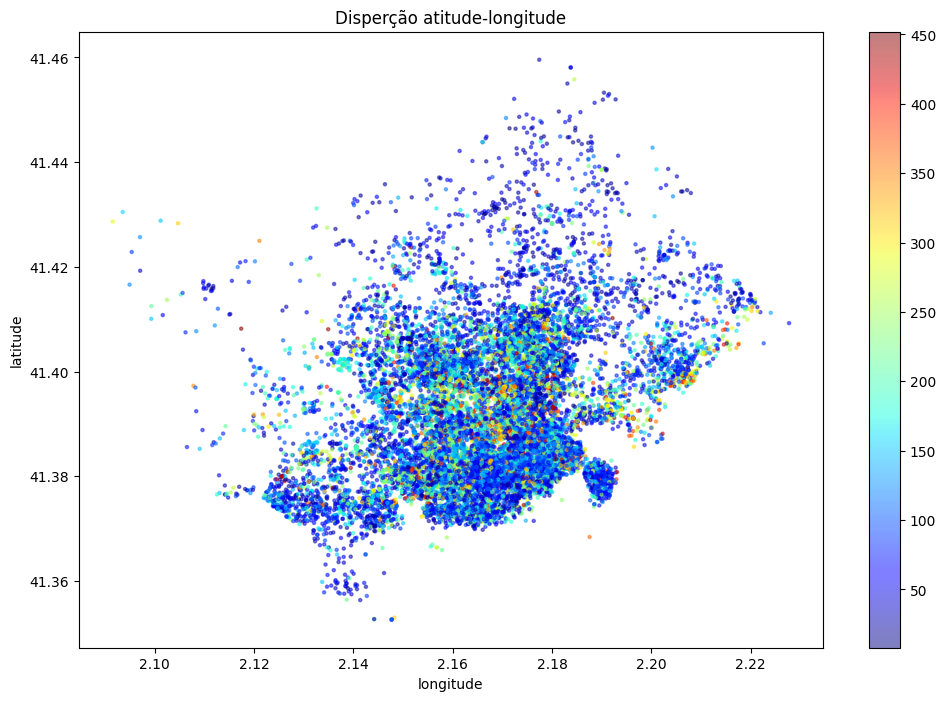

In [58]:
# plotar os imóveis pela latitude-longitude
fig, ax = plt.subplots(figsize=(12,8))

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.5, c=df_clean['price'], s=5,
              cmap=plt.get_cmap('jet'), ax=ax);
ax.set_title('Disperção atitude-longitude')

plt.show()


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [50]:
# ver a média da coluna `minimum_nights
df_clean.minimum_nights.mean()

12.790543851053405


## A cidade de Barcelona é um bom lugar para viajar, realizar intercâmbio e trabalhos sazonais. Dessa maneira, segue alguns direcionamentos baseado nos dados que foram alizados acima.


* A base de dados possuim um total de `17230` Entradas e `18` Variáveis

* O valor médio do aluguel é de `136 €/noite`

* Os tipos de imóveis mais alugados são o **Entire home/apt** com `58,37%` e **Private room** com `39,92%`. Os demais, *Shared room* e *Hotel room* são inferiores a `1%`

* A média de alocação são de `12` **noites**

* As cidades **la Vila Olímpica del Poblenou**, **Diagonal Mar i el Front Marítim del  Poblenou** e **la Dreta de l'Eixample** estão dentre as mais `caras` para ser alugadas e a cidade **el Parc i la Llacuna del Poblenou** é a que possui o `menor` custo por noite

* A cidade **la Dreta de l'Eixample** se mostrou mais `atraente` por possuir `maior quantidade de imóveis disponíveis` para locação.



> [O que fazer em **la Dreta de l'Eixample**?](https://www.tripadvisor.com.br/Attractions-g187497-Activities-zfn15565885-Barcelona_Catalonia.html)


<center><img alt="TripAdvisor" width="35%" src="https://static.tacdn.com/img2/brand_refresh/Tripadvisor_lockup_horizontal_secondary_registered.svg
"></center>

<center><img alt="la Dreta de l'Eixample" width="55%" src="https://chrieke-prettymapp-streamlit-prettymappapp-1k0qxh.streamlit.app/~/+/media/3018044a068fbd43c4ff6a4771050e802ba5943421c1d447d18d3295.png"></center>









